In [2]:
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from numpy import mean
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

## MEDICATIONS DATA

In [3]:
med24 = pd.read_csv('./med24.csv')

#EXTRACT FEATURES AND LABELS
Y24 = med24['aki_flag'] 
X24 = med24.iloc[:,2:] 

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train24, X_test24, y_train24, y_test24 = tts(X24, Y24, test_size=0.3, random_state=42)

In [4]:
med48 = pd.read_csv('./med48.csv')

Y48 = med48['aki_flag'] #all rows of 'aki_flag' as LABELS
X48 = med48.iloc[:,2:]  #features

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train48, X_test48, y_train48, y_test48 = tts(X48, Y48, test_size=0.3, random_state=42)

In [5]:
#APPLY THE SMOTE TOMEK-LINKS TECHNIQUE TO COPE WITH CLASS IMBALANCE PROBLEM 
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

#DEFINE THE PARAMETERS TO BE TESTED IN THE GRID SEARCH
params = [
  {'learning_rate':[0.1,0.05,0.01,1,0.5,0.25, 0.75], 'max_depth' :[1,2,3,4,5], 'n_estimators':[100,250,500]}
] 

In [6]:
gs24 = GridSearchCV(GradientBoostingClassifier(), params, refit = True, verbose = 3)
p24 = Pipeline(steps=[('r', resample), ('gs', gs24)])

gs48 = GridSearchCV(GradientBoostingClassifier(), params, refit = True, verbose = 3)
p48 = Pipeline(steps=[('r', resample), ('gs', gs48)])

Now fit the grid search and extract the best parameters/estimator to be used fro the prediction 

In [7]:
gs24.fit(X_train24, y_train24)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.706 total time=   4.3s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.706 total time=   4.0s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=   4.1s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=   2.6s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=   2.6s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.706 total time=   6.1s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.706 total time=   6.0s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.705 total time=   5.9s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.705 total time=  10.1s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.705 total 

[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.706 total time=  17.9s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.705 total time=  20.4s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.705 total time=  24.7s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.705 total time=  22.8s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.706 total time=   4.3s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.706 total time=   4.2s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   4.2s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   4.2s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   4.2s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=250;, score=0.706 total time=  10.9s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.705 total time=  18.2s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.705 total time=  12.6s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.705 total time=  12.7s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.706 total time=  24.8s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.706 total time=  33.1s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  32.8s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  24.5s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  27.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.706 total time=   5.8s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.706 total time=   5.5s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.705 total time=   4.2s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.706 total time=  10.9s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.706 total time=  10.0s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.705 total time=  14.8s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.705 total time=  17.1s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.705 total time=  15.1s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.706 total time=  24.3s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.706 total time=  27.6s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.705 total time=  23.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.705 total time=  15.7s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.

[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.705 total time=   4.0s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.705 total time=   5.4s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.705 total time=   4.7s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.706 total time=  11.2s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.706 total time=  12.0s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.705 total time=  10.8s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.705 total time=  10.8s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.705 total time=  12.0s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.706 total time=  22.9s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.706 total time=  32.9s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_est

[CV 4/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.705 total time=  22.5s
[CV 5/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.705 total time=  35.2s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.706 total time=   5.2s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.706 total time=   5.0s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.705 total time=   4.8s
[CV 4/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.705 total time=   5.2s
[CV 5/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.705 total time=   4.4s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.706 total time=  12.9s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.706 total time=  18.4s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.705 total time=  14.8s
[CV 4/5] END learning_rate=0.25, max_dep

[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=250;, score=0.705 total time=  12.1s
[CV 1/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.706 total time=  30.2s
[CV 2/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.706 total time=  25.1s
[CV 3/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.705 total time=  22.9s
[CV 4/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.705 total time=  23.2s
[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.705 total time=  19.2s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01, 1, 0.5, 0.25,
                                            0.75],
                          'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             verbose=3)

In [8]:
print("The best parameters found for the 24h DCW:")
print(gs24.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 24h DCW:")
print(gs24.best_estimator_)

The best parameters found for the 24h DCW:
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
The best estimator found for the 24h DCW:
GradientBoostingClassifier(max_depth=1)


In [9]:
gs48.fit(X_train48, y_train48)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.6s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.8s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.763 total time=   1.5s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.7s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.4s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total time=   4.2s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total time=   4.2s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.763 total time=   3.8s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total time=   4.9s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total 

[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.764 total time=   7.4s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.763 total time=  10.1s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.764 total time=   9.5s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.764 total time=   8.1s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   1.8s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   1.7s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.763 total time=   1.9s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   2.3s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   1.7s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=250;, score=0.764 total time=   5.4s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.763 total time=   5.3s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.764 total time=   4.9s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.764 total time=   6.5s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=  11.2s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=  10.5s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.763 total time=  11.7s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=  10.4s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=  10.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.764 total time=   2.5s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.764 total time=   2.9s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.764 total time=   3.6s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.764 total time=   8.8s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.764 total time=   6.4s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.763 total time=   6.2s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.764 total time=   6.1s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.764 total time=   6.3s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.764 total time=  14.1s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.764 total time=  14.6s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.763 total time=  12.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.764 total time=  14.3s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.

[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.763 total time=   2.1s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.764 total time=   2.2s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.764 total time=   2.1s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.764 total time=   6.6s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.764 total time=   7.3s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.763 total time=   6.3s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.764 total time=   7.3s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.764 total time=   7.4s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.764 total time=  12.7s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.764 total time=  17.5s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_est

[CV 4/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.764 total time=   9.9s
[CV 5/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.764 total time=  10.3s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.764 total time=   2.8s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.764 total time=   2.1s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.763 total time=   1.9s
[CV 4/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.764 total time=   2.3s
[CV 5/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.764 total time=   2.1s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.764 total time=   5.9s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.764 total time=   6.7s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.763 total time=   5.0s
[CV 4/5] END learning_rate=0.25, max_dep

[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=250;, score=0.764 total time=   5.9s
[CV 1/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.764 total time=  14.1s
[CV 2/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.764 total time=  10.5s
[CV 3/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.763 total time=   9.6s
[CV 4/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.764 total time=  10.8s
[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.764 total time=   9.9s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01, 1, 0.5, 0.25,
                                            0.75],
                          'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             verbose=3)

In [10]:
print("The best parameters found for the 48h DCW:")
print(gs48.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 48h DCW:")
print(gs48.best_estimator_)

The best parameters found for the 48h DCW:
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
The best estimator found for the 48h DCW:
GradientBoostingClassifier(max_depth=1)


In [11]:
best24 = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 1, n_estimators =100)
best48 = GradientBoostingClassifier(learning_rate = 0.1, max_depth=1, n_estimators = 100)

In [12]:
y_pred24 = cross_val_predict(best24, X24, Y24, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.5s finished


In [13]:
y_pred48 = cross_val_predict(best48, X48, Y48, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s finished


In [20]:
#CLASSIFICATION REPORT 24H
print(classification_report(Y24, y_pred24))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83     10761
           1       0.00      0.00      0.00      4521

    accuracy                           0.70     15282
   macro avg       0.35      0.50      0.41     15282
weighted avg       0.50      0.70      0.58     15282



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print(accuracy_score(Y24, y_pred24))

0.704161758932077


In [22]:
print(precision_score(Y24, y_pred24))

0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(recall_score(Y24, y_pred24))

0.0


In [24]:
print(f1_score(Y24, y_pred24))

0.0


In [25]:
#CLASSIFICATION REPORT 48H
print(classification_report(Y48, y_pred48))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6021
           1       0.00      0.00      0.00      1841

    accuracy                           0.77      7862
   macro avg       0.38      0.50      0.43      7862
weighted avg       0.59      0.77      0.66      7862



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Elapsed time to compute the importances: 0.078 seconds


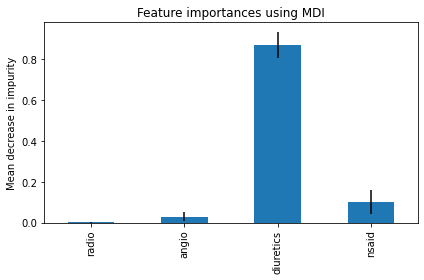

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#FEATURES SELECTION BASED ON THEIR IMPORTANCE WITH A RANDOM FOREST CLASSIFIER 
feature_names24 = [f'feature {i}' for i in range(X24.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train24, y_train24)

import time

start_time24 = time.time()
importances24 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time24 = time.time() - start_time24

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time24:.3f} seconds")

forest_importances24 = pd.Series(importances24, index=med24.columns[2:])

fig, ax = plt.subplots()
forest_importances24.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [27]:
for i,v in enumerate(importances24):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00118
Feature: 1, Score: 0.02973
Feature: 2, Score: 0.86943
Feature: 3, Score: 0.09966


Elapsed time to compute the importances: 0.071 seconds


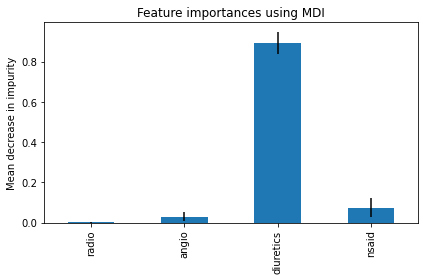

In [28]:
#DO IT FOR THE 48H DCW NOW
feature_names48 = [f'feature {i}' for i in range(X48.shape[1])]
#forest = RandomForestClassifier(random_state=0)
forest.fit(X_train48, y_train48)

start_time48 = time.time()
importances48 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time48 = time.time() - start_time48

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time48:.3f} seconds")

forest_importances48 = pd.Series(importances48, index=med48.columns[2:])

fig, ax = plt.subplots()
forest_importances48.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [29]:
for i,v in enumerate(importances48):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00261
Feature: 1, Score: 0.03066
Feature: 2, Score: 0.89231
Feature: 3, Score: 0.07441


## Try to use the function cross_validate( ) now.

In [33]:
#DEFINE THE METRICS 
scoring=['accuracy','precision','recall', 'roc_auc', 'f1']

In [34]:
p24 = Pipeline(steps=[('r', resample), ('m', best24)])

scores24 = cross_validate(p24, X24, Y24, scoring = scoring, cv = 5)

In [35]:
scores24['test_accuracy'].mean()

0.6391188491951354

In [36]:
scores24['test_precision'].mean()

0.42045600030270036

In [37]:
scores24['test_recall'].mean()

0.5795149855766881

In [38]:
scores24['test_f1'].mean()

0.487233802517239

In [39]:
scores24['test_roc_auc'].mean()

0.6366542836575038

In [40]:
p48 = Pipeline(steps=[('r', resample), ('m', best48)])

scores48 = cross_validate(p48, X48, Y48, scoring = scoring, cv = 5)

In [41]:
scores48['test_accuracy'].mean()

0.5909447596123515

In [42]:
scores48['test_precision'].mean()

0.3151194726890763

In [43]:
scores48['test_recall'].mean()

0.6366059856250736

In [44]:
scores48['test_f1'].mean()

0.4215376173687135

In [45]:
scores48['test_roc_auc'].mean()

0.6196585867415638

Now it should be re-perfomed the calculation of the best feature (?)